In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

In [ ]:
n = 1000 # sample size
n_var = 2
X, y = datasets.make_regression(n, n_features=n_var, n_informative=15, noise=5)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

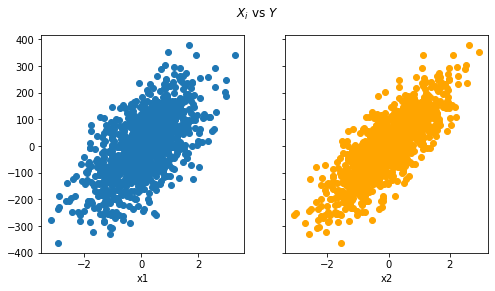

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8,4))

plt.suptitle('$X_i$ vs $Y$')

axes[0].scatter(X[:,0], y)
axes[0].set_xlabel('x1')

axes[1].scatter(X[:,1], y, color='orange')
axes[1].set_xlabel('x2')

plt.show()

In [ ]:
def mse(y, y_hat):
  # Mean Squared Error = Error Cuadratico Promedio
  return np.mean((y - y_hat)**2)

def mse_gradient(y, y_hat, x):
  diff = (y - y_hat).reshape(1, n)
  return diff @ x

In [ ]:
def gradient_descent(X, W, y, lr=1e-4, n_iter=10):
  w = np.copy(W)
  weights = []
  losses = []

  for _ in range(n_iter):
    y_hat = (X @ w).squeeze() # prediction con regresion lineal
    loss = mse(y, y_hat) # error
    losses.append(loss) # save errors
    
    loss_prime = mse_gradient(y, y_hat, X) # derivative
    w += (lr * loss_prime).reshape(w.shape) # Update step
    
    weights.append(w.tolist()) # save weights

    print(f"Step. {_+1} of {n_iter} ... Loss {loss}")

  return weights, losses, w

In [ ]:
W = np.random.random((n_var+1,1))

In [ ]:
W

array([[0.79024796],
       [0.63896689],
       [0.41274705]])

In [ ]:
X_ = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [ ]:
weights, losses, w1 = gradient_descent(X_, W, y, lr=1e-4, n_iter=50)

Step. 1 of 50 ... Loss 14512.834785422792
Step. 2 of 50 ... Loss 11744.146147925292
Step. 3 of 50 ... Loss 9504.90864354362
Step. 4 of 50 ... Loss 7693.806469441185
Step. 5 of 50 ... Loss 6228.924371328486
Step. 6 of 50 ... Loss 5044.0303763817365
Step. 7 of 50 ... Loss 4085.571207291084
Step. 8 of 50 ... Loss 3310.2436616767227
Step. 9 of 50 ... Loss 2683.03148239345
Step. 10 of 50 ... Loss 2175.61844603063
Step. 11 of 50 ... Loss 1765.1055275233791
Step. 12 of 50 ... Loss 1432.9738403865333
Step. 13 of 50 ... Loss 1164.2462364807184
Step. 14 of 50 ... Loss 946.8094868009048
Step. 15 of 50 ... Loss 770.8662678408131
Step. 16 of 50 ... Loss 628.4920797058966
Step. 17 of 50 ... Loss 513.2769914048848
Step. 18 of 50 ... Loss 420.0359630344856
Step. 19 of 50 ... Loss 344.57460951685647
Step. 20 of 50 ... Loss 283.49978805629576
Step. 21 of 50 ... Loss 234.06642620172215
Step. 22 of 50 ... Loss 194.05365197229582
Step. 23 of 50 ... Loss 161.66461677721182
Step. 24 of 50 ... Loss 135.445476

In [ ]:
weights = np.array(weights).squeeze()
losses = np.array(losses)

In [ ]:
weights.shape, losses.shape

((50, 3), (50,))

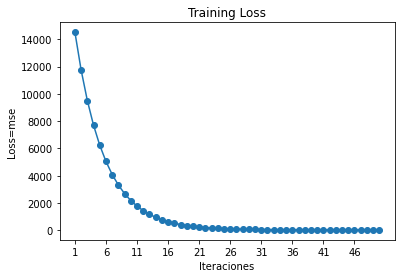

In [ ]:
plt.plot(range(1, losses.shape[0]+1), losses, marker='o')
plt.xticks(range(1, losses.shape[0]+1, 5))
plt.xlabel('Iteraciones')
plt.ylabel('Loss=mse')
plt.title('Training Loss')
plt.show()

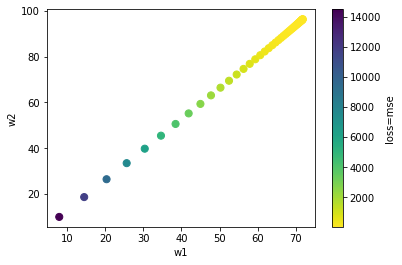

In [ ]:
plt.scatter(weights[:,1], weights[:,2], s=50, c=losses, cmap='viridis_r')
plt.xlabel("w1")
plt.ylabel("w2")
cbar = plt.colorbar()
cbar.set_label('loss=mse')
plt.show()

In [ ]:
w0_range = np.linspace(weights[:,1].min() * 0.8, weights[:,1].max() * 1.1, 500)
w1_range = np.linspace(weights[:,2].min() * 0.8, weights[:,2].max() * 1.1, 500)
w0_, w1_ = np.meshgrid(w0_range, w1_range)

In [ ]:
stacked_grid = np.dstack((w0_, w1_))
stacked_grid[0][0] # weights candidate example

array([6.33598525, 8.02826345])

In [ ]:
stacked_grid.shape

(500, 500, 2)

In [ ]:
w_pairs = stacked_grid.reshape(-1, 2)

In [ ]:
w_pairs.shape

(250000, 2)

In [ ]:
search_space = np.array([mse(y, X @ w_pair) for w_pair in tqdm(w_pairs)])

100%|██████████| 250000/250000 [00:06<00:00, 39291.91it/s]


In [ ]:
search_grid = search_space.reshape(stacked_grid.shape[0], stacked_grid.shape[1])

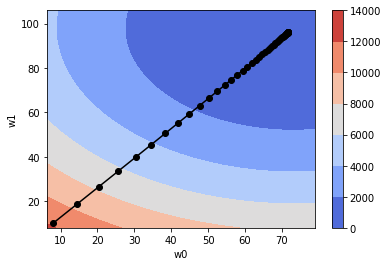

In [ ]:
plt.contourf(w0_range, w1_range, search_grid, cmap='coolwarm')
plt.plot(weights[:,1], weights[:,2], marker='o', color='k')
plt.xlabel("w0") # --> x0
plt.ylabel("w1") # --> x1
plt.colorbar()
plt.show()

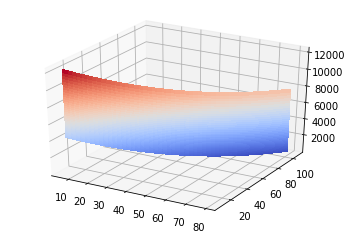

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(w0_range, w1_range, search_grid, cmap="coolwarm",
                       linewidth=0, antialiased=False)